In [2]:
import pandas as pd
import geopandas as gpd
from scipy.spatial import cKDTree

# first get cooresponding HEX_ID of origin and destination
# taxi_records = pd.read_csv('../../data/trip_records/hex_trips_2016-05.csv')
# taxi_gdf_o = gpd.GeoDataFrame(taxi_records,geometry=gpd.points_from_xy(taxi_records.origin_lon,taxi_records.origin_lat))

# polygons = gpd.read_file('../../data/NYC_shapefiles/snapped_clustered_hex.shp') 

# # polygons = polygons.to_crs({'init':'epsg:4326'}) # lon,lat unit: feet to degree

# polygons['CELL_ID']=polygons.index

# hex_tree = cKDTree(polygons[['lon','lat']]) # hex's centroid lon, lat
# _,ohex_ids = hex_tree.query(taxi_records[['origin_lon','origin_lat']],n_jobs=-1)
# _,dhex_ids = hex_tree.query(taxi_records[['destination_lon','destination_lat']],n_jobs=-1)
# taxi_records['o_hex_id'] = ohex_ids
# taxi_records['d_hex_id'] = dhex_ids

In [17]:
df = pd.read_csv('../../../../data/trip_records/yellow_tripdata_2019-05.csv')

In [18]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-05-01 00:14:50,2019-05-01 00:16:48,1,0.00,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
1,1,2019-05-01 00:35:54,2019-05-01 00:37:27,1,1.50,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
2,1,2019-05-01 00:37:45,2019-05-01 00:37:49,1,1.50,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0
3,1,2019-05-01 00:44:57,2019-05-01 00:50:11,1,0.70,1,N,161,161,2,5.0,3.0,0.5,0.00,0.0,0.3,8.80,2.5
4,1,2019-05-01 00:59:48,2019-05-01 01:10:22,1,2.00,1,N,163,141,1,9.5,3.0,0.5,2.00,0.0,0.3,15.30,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7565256,2,2019-05-31 23:22:08,2019-05-31 23:58:35,3,15.69,1,N,231,153,1,46.5,0.5,0.5,12.58,0.0,0.3,62.88,2.5
7565257,2,2019-05-31 23:10:12,2019-05-31 23:17:56,1,1.42,1,N,262,237,1,7.5,0.5,0.5,2.82,0.0,0.3,14.12,2.5
7565258,2,2019-05-31 23:38:07,2019-06-01 00:47:30,1,9.39,1,N,170,36,2,42.0,0.5,0.5,0.00,0.0,0.3,45.80,2.5
7565259,2,2019-05-31 23:59:08,2019-06-01 00:00:21,1,0.00,1,N,193,193,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0


In [19]:
from datetime import datetime
from pytz import timezone

tz = timezone("US/Eastern")

def get_local_datetime(timestamp):
    return tz.fromutc(datetime.utcfromtimestamp(timestamp))

def get_local_unixtime(datetime):
    return datetime.replace(tzinfo=tz).timestamp()

In [22]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-05-01 00:14:50,2019-05-01 00:16:48,1,0.00,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
1,1,2019-05-01 00:35:54,2019-05-01 00:37:27,1,1.50,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
2,1,2019-05-01 00:37:45,2019-05-01 00:37:49,1,1.50,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0
3,1,2019-05-01 00:44:57,2019-05-01 00:50:11,1,0.70,1,N,161,161,2,5.0,3.0,0.5,0.00,0.0,0.3,8.80,2.5
4,1,2019-05-01 00:59:48,2019-05-01 01:10:22,1,2.00,1,N,163,141,1,9.5,3.0,0.5,2.00,0.0,0.3,15.30,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7565256,2,2019-05-31 23:22:08,2019-05-31 23:58:35,3,15.69,1,N,231,153,1,46.5,0.5,0.5,12.58,0.0,0.3,62.88,2.5
7565257,2,2019-05-31 23:10:12,2019-05-31 23:17:56,1,1.42,1,N,262,237,1,7.5,0.5,0.5,2.82,0.0,0.3,14.12,2.5
7565258,2,2019-05-31 23:38:07,2019-06-01 00:47:30,1,9.39,1,N,170,36,2,42.0,0.5,0.5,0.00,0.0,0.3,45.80,2.5
7565259,2,2019-05-31 23:59:08,2019-06-01 00:00:21,1,0.00,1,N,193,193,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0


In [21]:
pd.to_datetime(df.head(10).tpep_pick12 up_datetime).apply(lambda x: int(get_local_unixtime(x)))

0    1556684090
1    1556685354
2    1556685465
3    1556685897
4    1556686788
5    1556686084
6    1556683526
7    1556684600
8    1556685354
9    1556684412
Name: tpep_pickup_datetime, dtype: int64

In [ ]:
df['request_datetime']

In [9]:
df['datetime'] = pd.to_datetime(df['request_datetime'],unit='s')

df['datetime']

0          2016-05-01 04:00:00
1          2016-05-01 04:00:00
2          2016-05-01 04:00:00
3          2016-05-01 04:00:00
4          2016-05-01 04:00:00
                   ...        
12937530   2016-06-01 03:59:58
12937531   2016-06-01 03:59:58
12937532   2016-06-01 03:59:58
12937533   2016-06-01 03:59:59
12937534   2016-06-01 03:59:59
Name: datetime, Length: 12937535, dtype: datetime64[ns]

<AxesSubplot:xlabel='hour'>

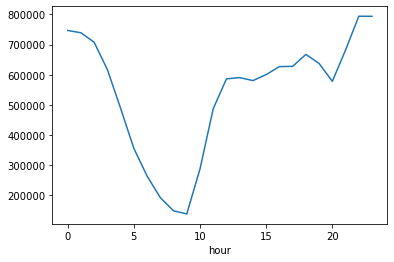

In [6]:
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

df.groupby('hour')['day'].count().plot()

<AxesSubplot:xlabel='hour'>

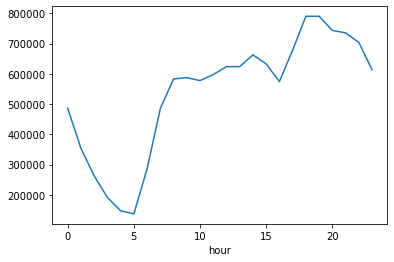

In [29]:
df['datetime'] = df['datetime']-pd.Timedelta('4H')
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

df.groupby('hour')['day'].count().plot()

In [39]:
taxi_records['datetime'] = pd.to_datetime(taxi_records['request_datetime'],unit='s')

taxi_records['datetime'] = taxi_records['datetime']-pd.Timedelta('4H')  # to shift it back to 12 AM - 12 AM.

taxi_records['day'] = taxi_records['datetime'].dt.day
taxi_records['hr'] = taxi_records['datetime'].dt.hour
taxi_records['min'] = taxi_records['datetime'].dt.minute
taxi_records['sec'] = taxi_records['datetime'].dt.second

taxi_records['tick'] = 60*taxi_records['hr']+taxi_records['min']

In [40]:
taxi_records

,id,request_datetime,trip_time,origin_lon,origin_lat,destination_lon,destination_lat,fare,o_hex_id,d_hex_id,datetime,day,hr,min,sec,tick
0,0,1462075200,1051,-73.985901,40.768040,-73.983986,40.730099,15.0,943,703,2016-05-01 00:00:00,1,0,0,0,0
1,1,1462075200,421,-73.993073,40.741573,-73.980995,40.744633,6.5,783,785,2016-05-01 00:00:00,1,0,0,0,0
2,2,1462075200,1187,-73.991943,40.684601,-74.002258,40.733002,17.0,429,742,2016-05-01 00:00:00,1,0,0,0,0
3,3,1462075200,451,-73.991577,40.744751,-73.975700,40.765469,7.5,783,907,2016-05-01 00:00:00,1,0,0,0,0
4,4,1462075200,399,-74.005280,40.740192,-73.997498,40.737564,6.0,782,743,2016-05-01 00:00:00,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12937530,12937530,1464753598,470,-73.979668,40.749489,-73.992943,40.725491,8.5,826,663,2016-05-31 23:59:58,31,23,59,58,1439
12937531,12937531,1464753598,426,-73.981552,40.780460,-73.968117,40.760532,8.0,1008,908,2016-05-31 23:59:58,31,23,59,58,1439
12937532,12937532,1464753598,342,-74.000793,40.731941,-73.991249,40.750450,6.5,742,824,2016-05-31 23:59:58,31,23,59,58,1439
12937533,12937533,1464753599,619,-73.975784,40.789474,-73.994179,40.764069,10.0,1035,905,2016-05-31 23:59:59,31,23,59,59,1439


In [41]:
# for dayx, day_sample in taxi_records.groupby('day'):
#     df = day_sample[['o_hex_id','d_hex_id','tick','day']]
#     df.columns = ['origin_hid','destination_hid','tick','day']
#     df.to_csv('../../data/daily_trips/%d.csv'%dayx,index=False)

In [42]:
day_sample = taxi_records[taxi_records['day']==25]
df = day_sample[['o_hex_id','d_hex_id','tick','day']]
df.columns = ['origin_hid','destination_hid','tick','day']
# df.to_csv('../../data/daily_trips/%d.csv'%dayx,index=False)

In [43]:
df1 = pd.read_csv('../../data/trips_on_day1.csv')

In [44]:
df1

,origin_hid,destination_hid,tick,day
0,943,1011,0,25
1,908,1061,0,25
2,824,863,0,25
3,959,1124,0,25
4,944,1058,0,25
...,...,...,...,...
405888,867,976,1439,25
405889,943,990,1439,25
405890,914,1017,1439,25
405891,663,782,1439,25


In [45]:
df

,origin_hid,destination_hid,tick,day
10326830,905,1036,0,25
10326831,784,946,0,25
10326832,825,589,0,25
10326833,825,864,0,25
10326834,663,782,0,25
...,...,...,...,...
10744394,906,622,1439,25
10744395,744,784,1439,25
10744396,886,928,1439,25
10744397,946,908,1439,25


In [46]:
import matplotlib.pyplot as plt

<AxesSubplot:>

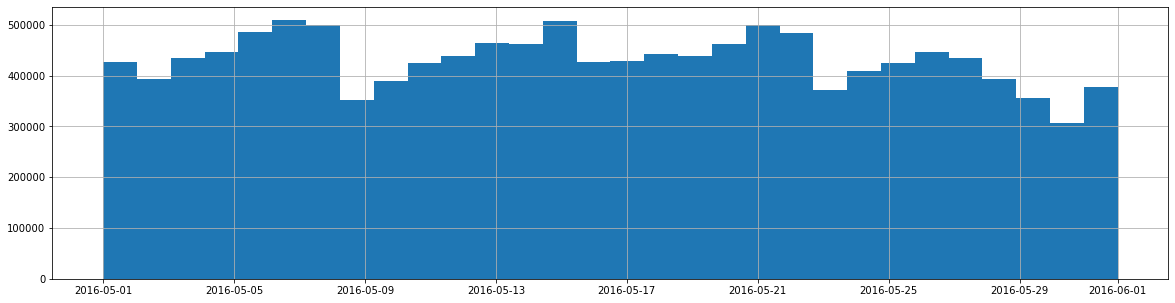

In [47]:
fig,axe = plt.subplots(figsize = (20,5))
taxi_records['datetime'].hist(ax=axe,bins=30)

In [53]:
day_df = taxi_records.groupby('day')['min'].count().reset_index(name='daily_count')

<AxesSubplot:xlabel='day'>

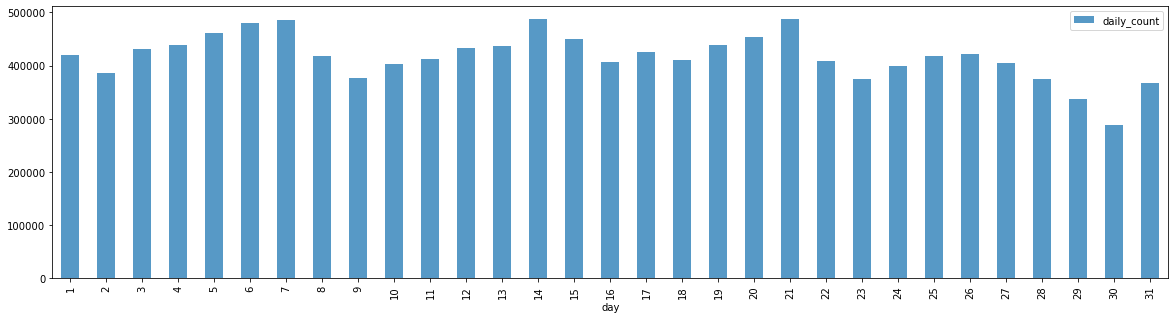

In [60]:
fig,axe = plt.subplots(figsize = (20,5))
day_df.plot.bar('day','daily_count',ax=axe,alpha=0.75)